In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# GET THE DATAFRAME.

import pandas as pd

df_path = "../../data/raw/debunking_review.tsv"
# df_path = "../../data/raw/hedges-all.tsv"
# df_path = "../../data/raw/studytype_multiclass.tsv"
df = pd.read_csv(df_path, sep="\t")

In [3]:
# PERFORM DATA PROCESSING (LEMATIZATION ETC), GET TFIDF SCORES AND FEATURE NAMES.
# COULD be parallelised
from eppi_text_classification import (
    get_features,
    get_labels,
    get_tfidf_and_names,
)

word_features = get_features(
    df,
    # title_key="TI",
    # abstract_key="AB",
)


number of processes: 12
number of processes: 12


In [4]:
labels = get_labels(
    df,
    # label_column_name="Class",
    # positive_class_value="CaseControlStudies",
)
tfidf_scores, feature_names = get_tfidf_and_names(word_features)

In [10]:
# PERFORM AN OPTUNA HYPERPARAMETER SEARCH, CAN CHANGE THE SEARCH SPACE IN OPT.PY

from eppi_text_classification import OptunaHyperparameterOptimisation

hyperparam_ranges = {
    "min_child_samples": {"low": 1, "high": 30, "log": False},
    "learning_rate": {"low": 0.1, "high": 0.6, "log": False},
    "num_leaves": {"low": 2, "high": 50, "log": False},
    "n_estimators": {"low": 100, "high": 100, "log": False},
    "min_split_gain": {"low": 1e-6, "high": 10, "log": False},
    "min_child_weight": {"low": 1e-6, "high": 1e-1, "log": True},
    "reg_alpha": {"low": 1e-5, "high": 10, "log": True},
    "reg_lambda": {"low": 1e-5, "high": 10, "log": True},
}

optimiser = OptunaHyperparameterOptimisation(
    tfidf_scores,
    labels,
    "LGBMClassifier",
    max_n_search_iterations=100,
    n_jobs=-1,
    nfolds=3,
    num_cv_repeats=1,
    # db_url=f"sqlite:////mnt/tmp/optuna.db", #Use this one on Azure
    db_url=None,
    timeout=600,
    use_early_terminator=False,
    max_stagnation_iterations=100,
    wilcoxon_trial_pruner_threshold=None,
    use_worse_than_first_two_pruner=False,
    user_selected_hyperparameter_ranges=hyperparam_ranges,
)

optimiser.delete_optuna_study("lgbm_binary")
best_params = optimiser.optimise_hyperparameters(study_name="lgbm_binary")

sqlite:////Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/optuna.db
{'max_depth': {'low': 1, 'high': 15, 'log': False}, 'min_child_samples': {'low': 1, 'high': 30, 'log': False}, 'learning_rate': {'low': 0.1, 'high': 0.6, 'log': False}, 'num_leaves': {'low': 2, 'high': 50, 'log': False}, 'n_estimators': {'low': 100, 'high': 100, 'log': False}, 'min_split_gain': {'low': 1e-06, 'high': 10, 'log': False}, 'min_child_weight': {'low': 1e-06, 'high': 0.1, 'log': True}, 'reg_alpha': {'low': 1e-05, 'high': 10, 'log': True}, 'reg_lambda': {'low': 1e-05, 'high': 10, 'log': True}}
Positive class weight: 27.363636363636363


[I 2024-10-07 12:44:39,320] A new study created in RDB with name: lgbm_binary
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/opt.py:763: ExperimentalWarning: BestValueStagnationEvaluator is experimental (supported from v3.4.0). The interface can change in the future.
  terminator = Terminator(
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/opt.py:766: ExperimentalWarning: StaticErrorEvaluator is experimental (supported from v3.2.0). The interface can change in the future.
  ),
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/opt.py:762: ExperimentalWarning: Terminator is experimental (supported from v3.2.0). The interface can change in the future.
  if self.max_stagnation_iterations is not None:
/Users/sjmolyneux/Documents/EPPI_Classification_Public/eppi_text_classification/eppi_text_classification/opt.py:769: Experi

Finished trial with scores: [0.8678304239401496, 0.5962593516209476, 0.7476901208244493]


[I 2024-10-07 12:44:39,654] Trial 0 finished with value: 0.7372599654618487 and parameters: {'max_depth': 14, 'min_child_samples': 12, 'learning_rate': 0.5298926430849182, 'num_leaves': 2, 'n_estimators': 100, 'min_split_gain': 9.443152045274136, 'min_child_weight': 0.011739616614992747, 'reg_alpha': 1.2318169705126505, 'reg_lambda': 0.0022916732879502935}. Best is trial 0 with value: 0.7372599654618487.


Finished trial with scores: [0.8703241895261846, 0.7965087281795512, 0.9152452025586354]
Finished trial with scores: [0.8904405652535329, 0.8166251039068995, 0.9543354655294954]
Finished trial with scores: [0.7834580216126351, 0.8708229426433916, 0.9330135039090263]
Finished trial with scores: [0.7025768911055694, 0.6201163757273482, 0.8202736318407959]
Finished trial with scores: [0.8961762261014131, 0.8719866999168744, 0.9502487562189054]
Finished trial with scores: [0.9162926018287615, 0.7830423940149627, 0.9507818052594172]
Finished trial with scores: [0.9060681629260183, 0.7921862011637573, 0.9251954513148544]
Finished trial with scores: [0.9203657522859519, 0.8475477971737323, 0.943319118692253]


[I 2024-10-07 12:44:39,901] Trial 7 finished with value: 0.8606927067547904 and parameters: {'max_depth': 11, 'min_child_samples': 24, 'learning_rate': 0.314470647112592, 'num_leaves': 27, 'n_estimators': 100, 'min_split_gain': 3.033214843524383, 'min_child_weight': 1.7253745900633538e-05, 'reg_alpha': 0.00022178168101953525, 'reg_lambda': 0.09868027483617749}. Best is trial 7 with value: 0.8606927067547904.
[I 2024-10-07 12:44:39,941] Trial 2 finished with value: 0.8871337115633092 and parameters: {'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.13584424236029177, 'num_leaves': 5, 'n_estimators': 100, 'min_split_gain': 8.887871987240027, 'min_child_weight': 3.143295058079291e-06, 'reg_alpha': 2.77172338353408e-05, 'reg_lambda': 0.007495655809997321}. Best is trial 2 with value: 0.8871337115633092.
[I 2024-10-07 12:44:39,964] Trial 4 finished with value: 0.862431489388351 and parameters: {'max_depth': 2, 'min_child_samples': 13, 'learning_rate': 0.45223204240500825, 'num_lea

Finished trial with scores: [0.8084788029925187, 0.626101413133832, 0.8080135039090262]
Finished trial with scores: [0.8935993349958438, 0.7700748129675811, 0.9490049751243781]
Finished trial with scores: [0.7007481296758105, 0.35627597672485456, 0.755685856432125]
Finished trial with scores: [0.8996674979218621, 0.8014962593516209, 0.9166666666666666]
Finished trial with scores: [0.7549459684123025, 0.541978387364921, 0.7914889836531628]
Finished trial with scores: [0.7733998337489608, 0.627763923524522, 0.9182658137882018]
Finished trial with scores: [0.8882793017456361, 0.7097256857855362, 0.9106254442075338]
Finished trial with scores: [0.8806317539484622, 0.774064837905237, 0.9319474058280028]


[I 2024-10-07 12:44:40,401] Trial 17 finished with value: 0.7731431903538949 and parameters: {'max_depth': 14, 'min_child_samples': 22, 'learning_rate': 0.39092785938023045, 'num_leaves': 46, 'n_estimators': 100, 'min_split_gain': 2.663423923807852, 'min_child_weight': 2.436648593194524e-05, 'reg_alpha': 0.01893528100283223, 'reg_lambda': 0.022204984428033293}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:40,577] Trial 16 finished with value: 0.836210143912902 and parameters: {'max_depth': 13, 'min_child_samples': 6, 'learning_rate': 0.19452286329096893, 'num_leaves': 14, 'n_estimators': 100, 'min_split_gain': 3.6776544060111775, 'min_child_weight': 0.03647304262237273, 'reg_alpha': 0.057951332817208594, 'reg_lambda': 6.400009573485572e-05}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:40,592] Trial 21 finished with value: 0.8622146658939007 and parameters: {'max_depth': 1, 'min_child_samples': 30, 'learning_rate': 0.24330808277095184, 'n

Finished trial with scores: [0.9231920199501247, 0.8109725685785536, 0.9431414356787491]
Finished trial with scores: [0.8738154613466335, 0.772901080631754, 0.9248400852878466]
Finished trial with scores: [0.689443059019119, 0.6943474646716542, 0.8393745557924663]


[I 2024-10-07 12:44:40,686] Trial 18 finished with value: 0.8924353414024758 and parameters: {'max_depth': 2, 'min_child_samples': 10, 'learning_rate': 0.15046465074240337, 'num_leaves': 46, 'n_estimators': 100, 'min_split_gain': 6.334330491116913, 'min_child_weight': 9.552848883752395e-05, 'reg_alpha': 0.004287187213621339, 'reg_lambda': 1.887010719694737e-05}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:40,693] Trial 23 finished with value: 0.8571855424220781 and parameters: {'max_depth': 1, 'min_child_samples': 30, 'learning_rate': 0.2662358555695819, 'num_leaves': 10, 'n_estimators': 100, 'min_split_gain': 4.349490785427751, 'min_child_weight': 0.0005697914102483797, 'reg_alpha': 1.8111208670133236e-05, 'reg_lambda': 9.040878499105352}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:40,704] Trial 13 finished with value: 0.7410550264944131 and parameters: {'max_depth': 15, 'min_child_samples': 7, 'learning_rate': 0.3532027656786144, 'nu

Finished trial with scores: [0.8907730673316708, 0.7936824605153782, 0.9593994314143568]
Finished trial with scores: [0.8777223607647547, 0.7566084788029925, 0.9282160625444208]
Finished trial with scores: [0.8241895261845386, 0.7488778054862844, 0.9170220326936745]
Finished trial with scores: [0.8996674979218621, 0.7970074812967581, 0.939410092395167]


[I 2024-10-07 12:44:41,071] Trial 30 finished with value: 0.8812849864204685 and parameters: {'max_depth': 9, 'min_child_samples': 19, 'learning_rate': 0.22258073173406057, 'num_leaves': 8, 'n_estimators': 100, 'min_split_gain': 5.274167848010028, 'min_child_weight': 0.008116992053821825, 'reg_alpha': 0.18803311593753255, 'reg_lambda': 0.7350351391078008}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:41,175] Trial 22 finished with value: 0.854182300704056 and parameters: {'max_depth': 1, 'min_child_samples': 3, 'learning_rate': 0.2597209742781016, 'num_leaves': 13, 'n_estimators': 100, 'min_split_gain': 4.7634473272681275, 'min_child_weight': 0.0005103063296129222, 'reg_alpha': 1.0213995507246294e-05, 'reg_lambda': 9.748307028734546}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:41,180] Trial 15 finished with value: 0.8300297881214992 and parameters: {'max_depth': 7, 'min_child_samples': 2, 'learning_rate': 0.3533458795972827, 'num_leaves

Finished trial with scores: [0.8886118038237739, 0.8083125519534498, 0.9371002132196162]
Finished trial with scores: [0.8926849542809643, 0.7780548628428927, 0.949182658137882]
Finished trial with scores: [0.8945968412302577, 0.9019118869492935, 0.9221748400852878]
Finished trial with scores: [0.9054031587697424, 0.8034912718204489, 0.937633262260128]


[I 2024-10-07 12:44:41,298] Trial 20 finished with value: 0.8780081896656133 and parameters: {'max_depth': 10, 'min_child_samples': 1, 'learning_rate': 0.25765867557979905, 'num_leaves': 13, 'n_estimators': 100, 'min_split_gain': 4.515729429744693, 'min_child_weight': 0.05725129450284445, 'reg_alpha': 1.335304641519007e-05, 'reg_lambda': 7.6706317616510695}. Best is trial 12 with value: 0.9061372274123977.
[I 2024-10-07 12:44:41,384] Trial 25 finished with value: 0.9062278560882797 and parameters: {'max_depth': 1, 'min_child_samples': 2, 'learning_rate': 0.24693186585545082, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 4.192261414032135, 'min_child_weight': 0.00043362252431078597, 'reg_alpha': 1.6153653209757537e-05, 'reg_lambda': 1.7441075941236759}. Best is trial 25 with value: 0.9062278560882797.
[I 2024-10-07 12:44:41,394] Trial 24 finished with value: 0.8733074917539131 and parameters: {'max_depth': 2, 'min_child_samples': 1, 'learning_rate': 0.2484119064748865, 'num_l

Finished trial with scores: [0.8788861180382377, 0.7453034081463009, 0.9403873489694387]
Finished trial with scores: [0.8950124688279302, 0.7531172069825436, 0.9212864250177684]
Finished trial with scores: [0.8563591022443889, 0.8019118869492935, 0.9311478322672352]
Finished trial with scores: [0.886118038237739, 0.7567747298420615, 0.9326581378820186]
Finished trial with scores: [0.8366583541147132, 0.7932668329177058, 0.9260838663823738]
Finished trial with scores: [0.8768079800498754, 0.799667497921862, 0.9330135039090263]
Finished trial with scores: [0.8423108894430589, 0.7589359933499584, 0.9157782515991472]
Finished trial with scores: [0.9237738985868662, 0.8325020781379884, 0.9449182658137881]
Finished trial with scores: [0.9037406483790524, 0.7577722360764755, 0.9241293532338309]


[I 2024-10-07 12:44:41,574] Trial 27 finished with value: 0.854858958384659 and parameters: {'max_depth': 9, 'min_child_samples': 1, 'learning_rate': 0.2815044388726362, 'num_leaves': 8, 'n_estimators': 100, 'min_split_gain': 7.669536210785147, 'min_child_weight': 0.0006421995074501861, 'reg_alpha': 1.000187811423822e-05, 'reg_lambda': 8.587950640509309}. Best is trial 25 with value: 0.9062278560882797.
[I 2024-10-07 12:44:41,588] Trial 26 finished with value: 0.856472033609414 and parameters: {'max_depth': 1, 'min_child_samples': 2, 'learning_rate': 0.23904042759804178, 'num_leaves': 10, 'n_estimators': 100, 'min_split_gain': 3.9029587997913366, 'min_child_weight': 0.0004961000924661242, 'reg_alpha': 1.157962773578349e-05, 'reg_lambda': 4.98769411287089}. Best is trial 25 with value: 0.9062278560882797.
[I 2024-10-07 12:44:41,595] Trial 33 finished with value: 0.8631396071536392 and parameters: {'max_depth': 3, 'min_child_samples': 10, 'learning_rate': 0.1921629291559625, 'num_leaves'

Finished trial with scores: [0.8511221945137157, 0.8205320033250207, 0.9291933191186923]
Finished trial with scores: [0.8301745635910224, 0.8399833748960932, 0.9558457711442786]
Finished trial with scores: [0.710058187863674, 0.686450540315877, 0.685589907604833]
Finished trial with scores: [0.860182876142976, 0.7394846217788861, 0.9545131485429993]


[I 2024-10-07 12:44:42,041] Trial 38 finished with value: 0.8753345698771314 and parameters: {'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.30602670496660517, 'num_leaves': 6, 'n_estimators': 100, 'min_split_gain': 7.945967253586874, 'min_child_weight': 0.0017508502140955048, 'reg_alpha': 9.322605248748641e-05, 'reg_lambda': 0.9032179037446247}. Best is trial 25 with value: 0.9062278560882797.
[I 2024-10-07 12:44:42,091] Trial 40 finished with value: 0.6940328785947947 and parameters: {'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.58992933319217, 'num_leaves': 2, 'n_estimators': 100, 'min_split_gain': 5.49855983530916, 'min_child_weight': 0.001572878395059618, 'reg_alpha': 5.506399372904457e-05, 'reg_lambda': 0.8272578506899979}. Best is trial 25 with value: 0.9062278560882797.
[I 2024-10-07 12:44:42,124] Trial 39 finished with value: 0.8513935488216204 and parameters: {'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.2965911356729629, 'num_leaves': 

Finished trial with scores: [0.8977556109725686, 0.9029093931837074, 0.9267945984363894]
Finished trial with scores: [0.8937655860349127, 0.9120532003325021, 0.9311478322672352]
Finished trial with scores: [0.9364089775561097, 0.8384039900249377, 0.9344349680170576]
Finished trial with scores: [0.9318370739817123, 0.8325852036575229, 0.9363894811656006]
Finished trial with scores: [0.9105569409808811, 0.8334164588528679, 0.923773987206823]


[I 2024-10-07 12:44:42,246] Trial 42 finished with value: 0.9091532008642219 and parameters: {'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.3137407963525139, 'num_leaves': 3, 'n_estimators': 100, 'min_split_gain': 5.615464642140073, 'min_child_weight': 0.0017604662720147055, 'reg_alpha': 0.00011890661667489716, 'reg_lambda': 0.9632631316737372}. Best is trial 42 with value: 0.9091532008642219.
[I 2024-10-07 12:44:42,264] Trial 44 finished with value: 0.91232220621155 and parameters: {'max_depth': 5, 'min_child_samples': 5, 'learning_rate': 0.29790889611053395, 'num_leaves': 3, 'n_estimators': 100, 'min_split_gain': 5.504908867943495, 'min_child_weight': 0.0018054040841548598, 'reg_alpha': 5.440834113897048e-05, 'reg_lambda': 1.0078180731376574}. Best is trial 44 with value: 0.91232220621155.
[I 2024-10-07 12:44:42,272] Trial 43 finished with value: 0.9030826451993684 and parameters: {'max_depth': 5, 'min_child_samples': 4, 'learning_rate': 0.30522220385411414, 'num_leaves'

Finished trial with scores: [0.9319201995012468, 0.8350789692435577, 0.92590618336887]
Finished trial with scores: [0.9295095594347464, 0.8957605985037406, 0.931769722814499]
Finished trial with scores: [0.8886118038237738, 0.8615128844555278, 0.9314143567874912]
Finished trial with scores: [0.904322527015794, 0.47339983374896094, 0.6886993603411514]
Finished trial with scores: [0.774563591022444, 0.6977556109725686, 0.3643390191897654]
Finished trial with scores: [0.7810473815461347, 0.7941812136325853, 0.7590618336886994]
Finished trial with scores: [0.8878636741479634, 0.8625103906899418, 0.9275053304904051]


[I 2024-10-07 12:44:42,462] Trial 47 finished with value: 0.8976351173712249 and parameters: {'max_depth': 5, 'min_child_samples': 4, 'learning_rate': 0.30907737779250805, 'num_leaves': 2, 'n_estimators': 100, 'min_split_gain': 9.897745862099356, 'min_child_weight': 0.0019587773023947382, 'reg_alpha': 8.019555115441826e-05, 'reg_lambda': 0.24937882254192856}. Best is trial 44 with value: 0.91232220621155.
[I 2024-10-07 12:44:42,485] Trial 45 finished with value: 0.9190132935843286 and parameters: {'max_depth': 5, 'min_child_samples': 4, 'learning_rate': 0.3262036292508216, 'num_leaves': 2, 'n_estimators': 100, 'min_split_gain': 5.498600703670656, 'min_child_weight': 0.014176076769377615, 'reg_alpha': 5.6818403809320946e-05, 'reg_lambda': 0.9855708001469132}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:42,498] Trial 41 finished with value: 0.6888072403686354 and parameters: {'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.5989741663153577, 'num_leaves

Finished trial with scores: [0.8098919368246053, 0.686616791354946, 0.8893034825870646]
Finished trial with scores: [0.7851205320033251, 0.6710723192019951, 0.8988095238095237]
Finished trial with scores: [0.7770573566084789, 0.6634247714048213, 0.8988095238095237]


[I 2024-10-07 12:44:42,762] Trial 53 finished with value: 0.7952707369222053 and parameters: {'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.3473146127460959, 'num_leaves': 4, 'n_estimators': 100, 'min_split_gain': 6.479628803535987, 'min_child_weight': 0.0211375986554009, 'reg_alpha': 3.2096419321166594e-05, 'reg_lambda': 0.22964763702317204}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:42,765] Trial 54 finished with value: 0.7850007916716146 and parameters: {'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.32914350185890245, 'num_leaves': 4, 'n_estimators': 100, 'min_split_gain': 6.855250689298263, 'min_child_weight': 0.0177950789385655, 'reg_alpha': 0.00019549733802031577, 'reg_lambda': 0.27798977478401177}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:42,886] Trial 56 finished with value: 0.7797638839409413 and parameters: {'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.3284835716646647, 'num_leaves'

Finished trial with scores: [0.7873649210307565, 0.7556109725685785, 0.9043176972281449]
Finished trial with scores: [0.8060681629260182, 0.7882793017456359, 0.8200071073205403]
Finished trial with scores: [0.7842892768079801, 0.6819617622610141, 0.8487917555081733]
Finished trial with scores: [0.8128844555278472, 0.7164588528678304, 0.871268656716418]
Finished trial with scores: [0.911886949293433, 0.7875311720698255, 0.8878820184790334]
Finished trial with scores: [0.9106400665004155, 0.8004156275976725, 0.9254619758351101]
Finished trial with scores: [0.8501246882793018, 0.5985037406483791, 0.849680170575693]
Finished trial with scores: [0.6019118869492934, 0.6986699916874481, 0.7045131485429993]
Finished trial with scores: [0.8821280133000831, 0.776226101413134, 0.9314143567874911]


[I 2024-10-07 12:44:43,020] Trial 55 finished with value: 0.8157645302758266 and parameters: {'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.34455126390542073, 'num_leaves': 4, 'n_estimators': 100, 'min_split_gain': 6.854397879690506, 'min_child_weight': 0.018136457836944165, 'reg_alpha': 3.1793308584835045e-05, 'reg_lambda': 0.3263536829172959}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,057] Trial 60 finished with value: 0.7716809315257226 and parameters: {'max_depth': 6, 'min_child_samples': 7, 'learning_rate': 0.3459005573307699, 'num_leaves': 16, 'n_estimators': 100, 'min_split_gain': 7.134412381331655, 'min_child_weight': 0.005328662061808877, 'reg_alpha': 0.0001926529321141933, 'reg_lambda': 0.0349255349467919}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,060] Trial 58 finished with value: 0.8047848573307315 and parameters: {'max_depth': 6, 'min_child_samples': 7, 'learning_rate': 0.3328092163916207, 'num_leave

Finished trial with scores: [0.8232751454696592, 0.7300083125519535, 0.8895700071073206]
Finished trial with scores: [0.8243557772236078, 0.7321695760598504, 0.902452025586354]
Finished trial with scores: [0.8936824605153783, 0.7193682460515378, 0.8981876332622601]
Finished trial with scores: [0.8157938487115545, 0.8228595178719867, 0.9400319829424306]


[I 2024-10-07 12:44:43,227] Trial 64 finished with value: 0.8632561571669027 and parameters: {'max_depth': 6, 'min_child_samples': 7, 'learning_rate': 0.325298235356451, 'num_leaves': 5, 'n_estimators': 100, 'min_split_gain': 7.148733738464295, 'min_child_weight': 0.00023403859189026838, 'reg_alpha': 0.00018090237901582766, 'reg_lambda': 2.2827133412446794}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,262] Trial 62 finished with value: 0.8196591262899373 and parameters: {'max_depth': 6, 'min_child_samples': 8, 'learning_rate': 0.3274365411778961, 'num_leaves': 17, 'n_estimators': 100, 'min_split_gain': 7.132928107543217, 'min_child_weight': 0.0010069480839748318, 'reg_alpha': 0.00019117709640706536, 'reg_lambda': 2.21917341404306}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,283] Trial 65 finished with value: 0.8142844883763111 and parameters: {'max_depth': 2, 'min_child_samples': 8, 'learning_rate': 0.3929550540283573, 'num_leave

Finished trial with scores: [0.6121363258520368, 0.7600997506234413, 0.7764747690120825]
Finished trial with scores: [0.8588528678304239, 0.7733167082294264, 0.8909026297085999]
Finished trial with scores: [0.6843724023275146, 0.45461346633416455, 0.8667377398720684]
Finished trial with scores: [0.6155444721529509, 0.7911886949293433, 0.8113006396588486]


[I 2024-10-07 12:44:43,497] Trial 71 finished with value: 0.7162369484958534 and parameters: {'max_depth': 12, 'min_child_samples': 26, 'learning_rate': 0.37371588908880937, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 6.078843384072692, 'min_child_weight': 0.0002474680246789681, 'reg_alpha': 0.047320090475042854, 'reg_lambda': 0.0018674757686083382}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,502] Trial 69 finished with value: 0.8410240685894834 and parameters: {'max_depth': 11, 'min_child_samples': 26, 'learning_rate': 0.2785288548424707, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 5.9025968584371915, 'min_child_weight': 0.00022536866579638793, 'reg_alpha': 0.04133765458796179, 'reg_lambda': 0.0029513081374602256}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,543] Trial 72 finished with value: 0.7393446022470477 and parameters: {'max_depth': 12, 'min_child_samples': 13, 'learning_rate': 0.375085984704716

Finished trial with scores: [0.9081463009143808, 0.4704904405652535, 0.7100213219616204]
Finished trial with scores: [0.8265170407315046, 0.7297589359933498, 0.9591329068941009]


[I 2024-10-07 12:44:43,737] Trial 73 finished with value: 0.6962193544804182 and parameters: {'max_depth': 5, 'min_child_samples': 12, 'learning_rate': 0.40656808394214794, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 6.205372241046554, 'min_child_weight': 0.03900514668577857, 'reg_alpha': 0.0003867193538781716, 'reg_lambda': 0.0036629953860638077}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:43,741] Trial 74 finished with value: 0.8384696278729851 and parameters: {'max_depth': 5, 'min_child_samples': 12, 'learning_rate': 0.27730921856446844, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 6.20329669387654, 'min_child_weight': 0.0002634115096326165, 'reg_alpha': 0.0007331946555891988, 'reg_lambda': 0.00373915716543909}. Best is trial 45 with value: 0.9190132935843286.


Finished trial with scores: [0.868744804655029, 0.669077306733167, 0.8799751243781093]
Finished trial with scores: [0.7908561928512053, 0.8265170407315046, 0.824360341151386]
Finished trial with scores: [0.7246882793017456, 0.6892768079800499, 0.9489161336176262]
Finished trial with scores: [0.7802161263507896, 0.6757273482959268, 0.9306147832267234]
Finished trial with scores: [0.7121363258520365, 0.8285951787198671, 0.8241826581378822]


[I 2024-10-07 12:44:44,224] Trial 78 finished with value: 0.8059324119221017 and parameters: {'max_depth': 5, 'min_child_samples': 3, 'learning_rate': 0.27524470267115553, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 6.0066003097072045, 'min_child_weight': 0.03878396272810859, 'reg_alpha': 0.03996245996587053, 'reg_lambda': 0.004187043464737969}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,266] Trial 76 finished with value: 0.813911191578032 and parameters: {'max_depth': 12, 'min_child_samples': 2, 'learning_rate': 0.28361852009581, 'num_leaves': 11, 'n_estimators': 100, 'min_split_gain': 6.012479037884491, 'min_child_weight': 0.03443498135466024, 'reg_alpha': 0.0009911568451962899, 'reg_lambda': 0.004960021480722022}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,327] Trial 75 finished with value: 0.7876270736331406 and parameters: {'max_depth': 11, 'min_child_samples': 2, 'learning_rate': 0.2706645353063027, 'num_leave

Finished trial with scores: [0.9081463009143806, 0.6716541978387363, 0.9392324093816631]
Finished trial with scores: [0.8741479634247714, 0.6932668329177056, 0.9479388770433547]
Finished trial with scores: [0.9271820448877807, 0.8172901080631754, 0.9493603411513859]
Finished trial with scores: [0.9369908561928512, 0.8159600997506234, 0.9438521677327648]
Finished trial with scores: [0.9266832917705736, 0.8492103075644223, 0.9513148542999289]


[I 2024-10-07 12:44:44,497] Trial 80 finished with value: 0.8396776360449266 and parameters: {'max_depth': 5, 'min_child_samples': 2, 'learning_rate': 0.2783493098580534, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 4.0007862341050835, 'min_child_weight': 0.05186300114078376, 'reg_alpha': 0.00873943208595764, 'reg_lambda': 9.752312423230089e-05}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,579] Trial 82 finished with value: 0.8979441647007805 and parameters: {'max_depth': 5, 'min_child_samples': 2, 'learning_rate': 0.11076708810382771, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 3.2177492963881273, 'min_child_weight': 0.0035268212677328522, 'reg_alpha': 0.008069611038426712, 'reg_lambda': 5.258681639211954e-05}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,580] Trial 84 finished with value: 0.8384512244619439 and parameters: {'max_depth': 5, 'min_child_samples': 2, 'learning_rate': 0.28105882580182934, 'num_l

Finished trial with scores: [0.9326683291770573, 0.8307564422277639, 0.9312366737739872]
Finished trial with scores: [0.8781379883624272, 0.7543640897755611, 0.9584221748400853]
Finished trial with scores: [0.915045719035744, 0.8395677472984205, 0.972636815920398]


[I 2024-10-07 12:44:44,810] Trial 83 finished with value: 0.8982204817262694 and parameters: {'max_depth': 5, 'min_child_samples': 2, 'learning_rate': 0.11400859659553313, 'num_leaves': 8, 'n_estimators': 100, 'min_split_gain': 4.1479486993205015, 'min_child_weight': 0.03707704286385995, 'reg_alpha': 0.10178457321963637, 'reg_lambda': 0.00015524387123368608}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,858] Trial 86 finished with value: 0.8636414176593578 and parameters: {'max_depth': 10, 'min_child_samples': 2, 'learning_rate': 0.21184211251678461, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 4.012879157286589, 'min_child_weight': 0.003681298006446122, 'reg_alpha': 0.007345901939256318, 'reg_lambda': 4.023318172315276e-05}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:44,881] Trial 90 finished with value: 0.9090834274181875 and parameters: {'max_depth': 9, 'min_child_samples': 16, 'learning_rate': 0.22620253779554994, 'num

Finished trial with scores: [0.8800498753117207, 0.7515378221113882, 0.9302594171997158]
Finished trial with scores: [0.8889443059019119, 0.7600997506234415, 0.9445628997867804]
Finished trial with scores: [0.8965918536990856, 0.7817123857024106, 0.9546908315565032]


[I 2024-10-07 12:44:45,138] Trial 88 finished with value: 0.8539490382076083 and parameters: {'max_depth': 10, 'min_child_samples': 3, 'learning_rate': 0.2222141257372496, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 4.00596560082594, 'min_child_weight': 0.01045857736835041, 'reg_alpha': 1.8916115535200852e-05, 'reg_lambda': 6.032959935948181e-05}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,139] Trial 87 finished with value: 0.8645356521040446 and parameters: {'max_depth': 9, 'min_child_samples': 3, 'learning_rate': 0.2168604912681215, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 4.182983176852409, 'min_child_weight': 0.0037210936300355528, 'reg_alpha': 2.1323207097876834e-05, 'reg_lambda': 8.734487071162076e-05}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,263] Trial 98 finished with value: 0.8776650236526665 and parameters: {'max_depth': 10, 'min_child_samples': 23, 'learning_rate': 0.16382569194559338, 'n

Finished trial with scores: [0.9308395677472984, 0.8081463009143807, 0.9449182658137882]
Finished trial with scores: [0.9045719035743973, 0.7805486284289277, 0.9577114427860696]
Finished trial with scores: [0.9245220282626766, 0.802161263507897, 0.9598436389481165]
Finished trial with scores: [0.9123857024106401, 0.8154613466334164, 0.9660625444207533]
Finished trial with scores: [0.9024106400665003, 0.8611803823773899, 0.9633972992181947]
Finished trial with scores: [0.915544472152951, 0.8144638403990025, 0.9516702203269366]
Finished trial with scores: [0.9170407315045719, 0.7612635078969243, 0.9273276474769012]


[I 2024-10-07 12:44:45,346] Trial 94 finished with value: 0.8946347114918224 and parameters: {'max_depth': 10, 'min_child_samples': 5, 'learning_rate': 0.12455044917407161, 'num_leaves': 31, 'n_estimators': 100, 'min_split_gain': 4.7781795052347915, 'min_child_weight': 0.006956643513270742, 'reg_alpha': 2.0212225771006754e-05, 'reg_lambda': 0.5691733386496107}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,369] Trial 99 finished with value: 0.8809439915964647 and parameters: {'max_depth': 10, 'min_child_samples': 17, 'learning_rate': 0.13095758363131232, 'num_leaves': 35, 'n_estimators': 100, 'min_split_gain': 1.6283007304769876, 'min_child_weight': 0.007073453654386714, 'reg_alpha': 1.84168699597101e-05, 'reg_lambda': 0.5467209025778235}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,404] Trial 96 finished with value: 0.89550897690623 and parameters: {'max_depth': 10, 'min_child_samples': 5, 'learning_rate': 0.23168254342722217, 'num

Finished trial with scores: [0.9448046550290939, 0.8679966749792186, 0.9749466950959489]
Finished trial with scores: [0.9045719035743973, 0.770906068162926, 0.9127576403695806]
Ending process, stopping_event set.
Finished trial with scores: [0.887115544472153, 0.8430590191188695, 0.9554015636105188]
Finished trial with scores: [0.9293433083956775, 0.871072319201995, 0.9434968017057569]
Ending process, stopping_event set.
Ending process, stopping_event set.
Finished trial with scores: [0.8922693266832918, 0.9205320033250208, 0.9344349680170575]
Ending process, stopping_event set.


[I 2024-10-07 12:44:45,553] Trial 97 finished with value: 0.8685439622927991 and parameters: {'max_depth': 4, 'min_child_samples': 5, 'learning_rate': 0.16974465435174196, 'num_leaves': 30, 'n_estimators': 100, 'min_split_gain': 5.213943844939587, 'min_child_weight': 0.012435589864486864, 'reg_alpha': 0.00011735551501471546, 'reg_lambda': 0.00034905551757383635}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,553] Trial 89 finished with value: 0.8938928442929633 and parameters: {'max_depth': 9, 'min_child_samples': 3, 'learning_rate': 0.11864998473052382, 'num_leaves': 7, 'n_estimators': 100, 'min_split_gain': 4.0840261251522, 'min_child_weight': 0.003157247787415915, 'reg_alpha': 0.007587063673009483, 'reg_lambda': 0.00016613305365946468}. Best is trial 45 with value: 0.9190132935843286.
[I 2024-10-07 12:44:45,570] Trial 100 finished with value: 0.9292493417014205 and parameters: {'max_depth': 4, 'min_child_samples': 22, 'learning_rate': 0.12725014219444775, '

Finished trial with scores: [0.9310058187863673, 0.8422277639235245, 0.933724235963042]
Ending process, stopping_event set.
Finished trial with scores: [0.9364921030756442, 0.8522028262676642, 0.9271499644633974]
Ending process, stopping_event set.
Finished trial with scores: [0.9296758104738154, 0.9167082294264339, 0.9388770433546553]
Ending process, stopping_event set.
Finished trial with scores: [0.9241895261845386, 0.9085619285120532, 0.94136460554371]
Ending process, stopping_event set.
Finished trial with scores: [0.8819617622610141, 0.8693266832917707, 0.9399431414356787]
Ending process, stopping_event set.
Finished trial with scores: [0.9095594347464672, 0.8766417290108063, 0.9506041222459133]
Ending process, stopping_event set.


[I 2024-10-07 12:44:45,763] Trial 102 finished with value: 0.902319272890978 and parameters: {'max_depth': 8, 'min_child_samples': 15, 'learning_rate': 0.25845408900788996, 'num_leaves': 3, 'n_estimators': 100, 'min_split_gain': 0.12604081250132987, 'min_child_weight': 0.0024795357093082655, 'reg_alpha': 0.0001256993145327743, 'reg_lambda': 0.0005372933265720755}. Best is trial 100 with value: 0.9292493417014205.
[I 2024-10-07 12:44:45,788] Trial 103 finished with value: 0.9052816312689019 and parameters: {'max_depth': 8, 'min_child_samples': 16, 'learning_rate': 0.24767307902808672, 'num_leaves': 3, 'n_estimators': 100, 'min_split_gain': 0.06536098740205634, 'min_child_weight': 0.0021438200238838973, 'reg_alpha': 4.6261760421787803e-05, 'reg_lambda': 0.000408130103573572}. Best is trial 100 with value: 0.9292493417014205.
[I 2024-10-07 12:44:45,809] Trial 105 finished with value: 0.9284203610849682 and parameters: {'max_depth': 8, 'min_child_samples': 19, 'learning_rate': 0.2565071472

In [21]:
# FIT THE MODEL

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

# model = LGBMClassifier(**best_params)

model = LGBMClassifier(
    verbosity=-1,
    boosting_type="gbdt",
    max_depth=4,
    min_child_samples=30,
    learning_rate=0.1245928917280467,
    num_leaves=6,
    n_estimators=2455,
    subsample_for_bin=20000,
    subsample=1.0,
    objective="binary",
    scale_pos_weight=27,
    min_split_gain=2.52381000405986e-06,
    min_child_weight=5.544840854157574e-06,
    reg_alpha=3.629909607712911e-05,
    reg_lambda=3.671749546766942e-05,
    n_jobs=1,
)

X_train, X_test, y_train, y_test = train_test_split(
    tfidf_scores, labels, test_size=0.333, stratify=labels, random_state=8
)

model.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.1245928917280467, max_depth=4,
               min_child_samples=30, min_child_weight=5.544840854157574e-06,
               min_split_gain=2.52381000405986e-06, n_estimators=2455, n_jobs=1,
               num_leaves=6, objective='binary',
               reg_alpha=3.629909607712911e-05,
               reg_lambda=3.671749546766942e-05, scale_pos_weight=27,
               subsample_for_bin=20000, verbosity=-1)

In [22]:
# CREATE ROC CURVE TO SELECT THRESHOLD p

from eppi_text_classification.predict import predict_scores
from eppi_text_classification.plotly_roc import plotly_roc

y_test_pred_probs = predict_scores(model, X_test)
plotly_roc(y_test, y_test_pred_probs)

In [23]:
# GET MODEL THRESHOLD FOR CHOSEN TPR, MAKE PREDICTIONS

from eppi_text_classification.predict import (
    get_raw_threshold,
    raw_threshold_predict,
)

threshold = get_raw_threshold(model, X_test, y_test, target_tpr=1)

y_test_pred = raw_threshold_predict(model, X_test, threshold)
y_train_pred = raw_threshold_predict(model, X_train, threshold)

In [24]:
from eppi_text_classification import binary_train_valid_confusion_plotly

binary_train_valid_confusion_plotly(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    postive_label="Included",
    negative_label="Excluded",
)

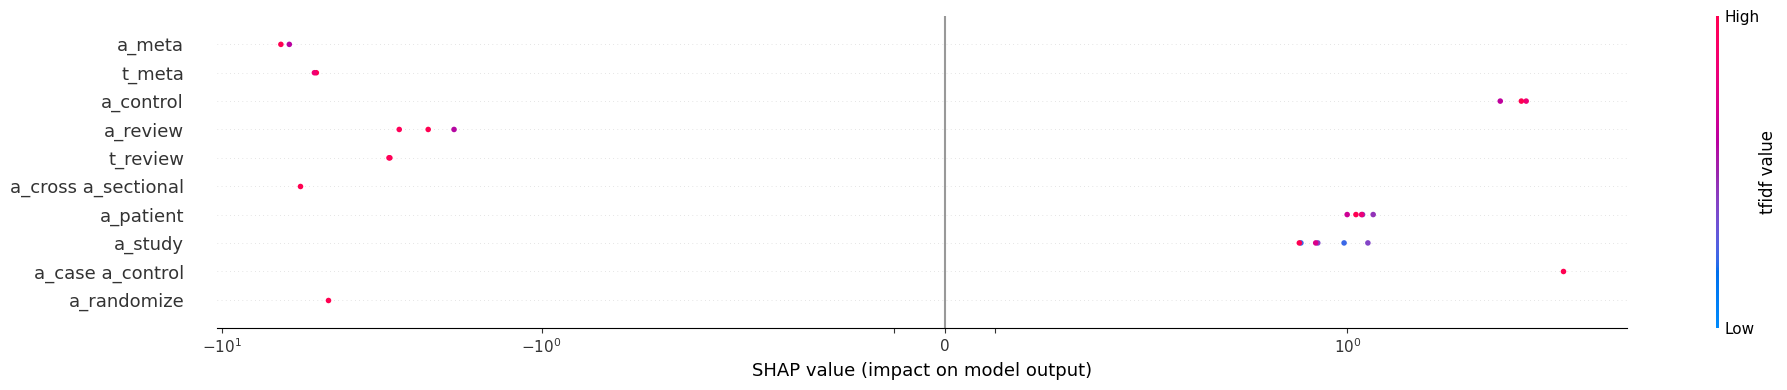

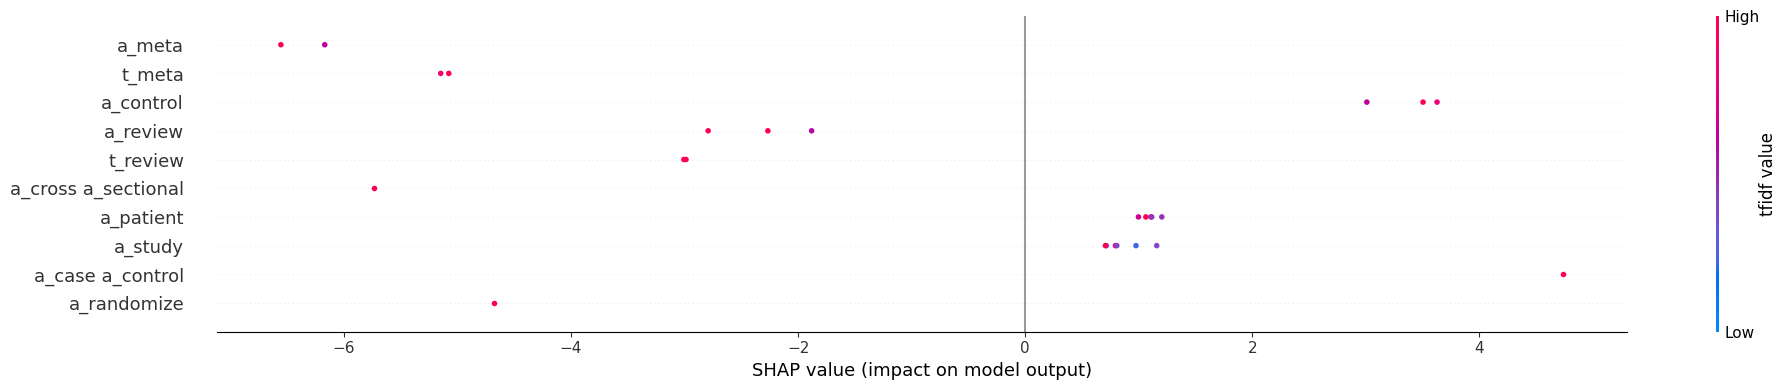

In [25]:
from eppi_text_classification import ShapPlotter

shap_plotter = ShapPlotter(
    model,
    X_test[:10],
    feature_names,
)
dot_plot = shap_plotter.dot_plot(num_display=10)
dot_plot.show()
dot_plot = shap_plotter.dot_plot(num_display=10, log_scale=False)
dot_plot.show()
bar_plot = shap_plotter.bar_chart()

Truth: 0
Prediction: [0]
Shap value: -20.17600657675702
Prediction score: [-20.17600658]


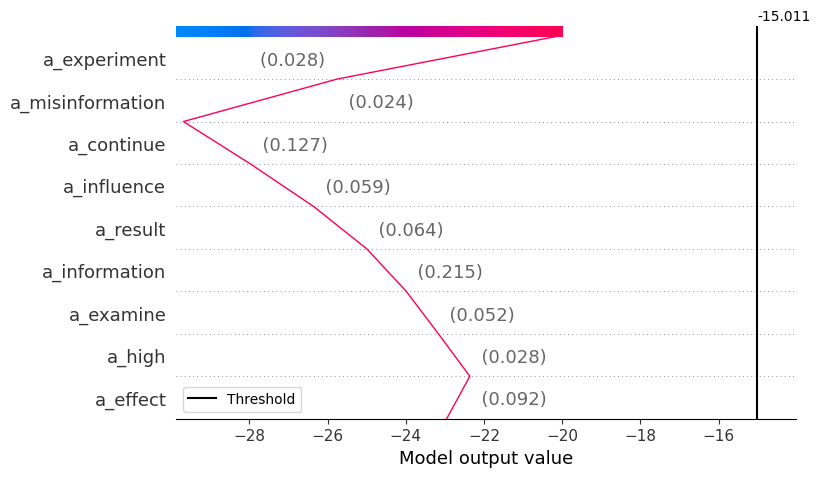

Truth: 0
Prediction: [1]
Shap value: -4.616688695926907
Prediction score: [-4.6166887]


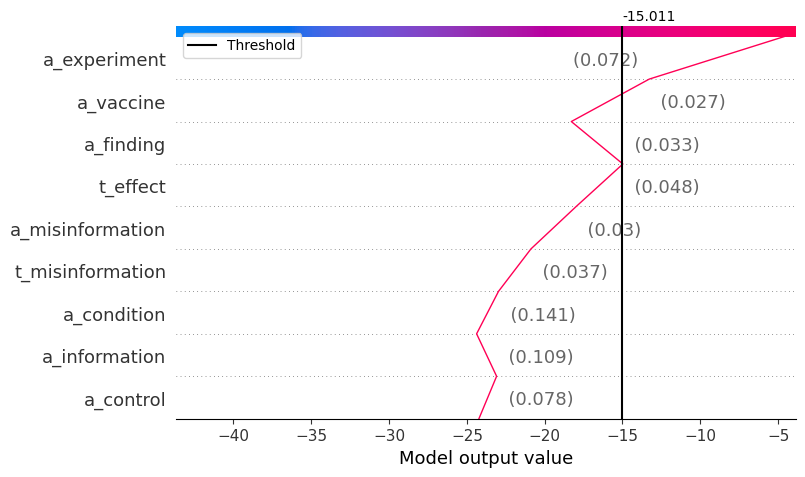

Truth: 0
Prediction: [0]
Shap value: -26.435449852322588
Prediction score: [-26.43544985]


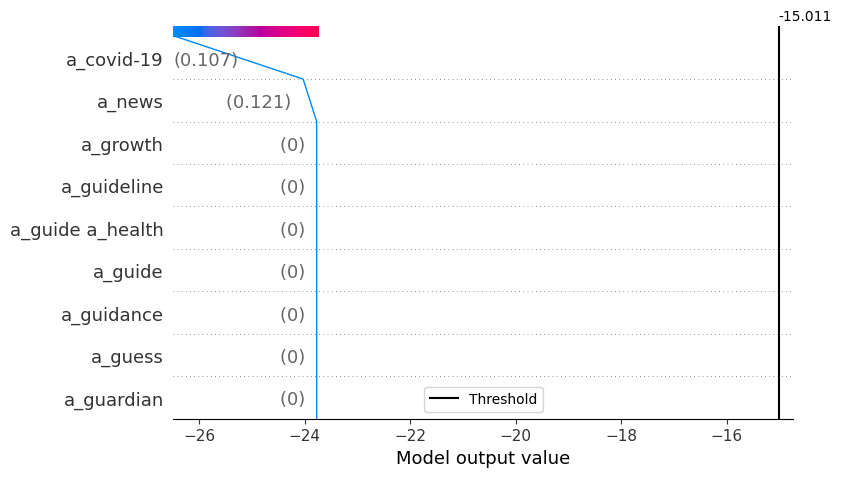

Truth: 0
Prediction: [0]
Shap value: -25.180047085786168
Prediction score: [-25.18004709]


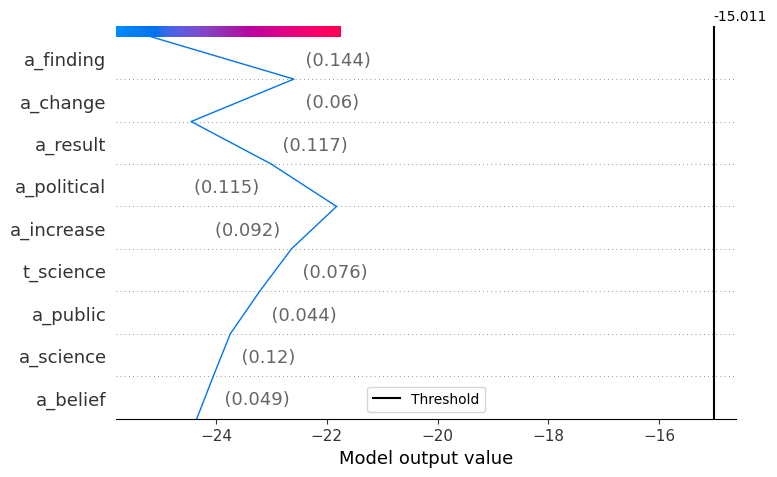

Truth: 0
Prediction: [1]
Shap value: -14.584450806452827
Prediction score: [-14.58445081]


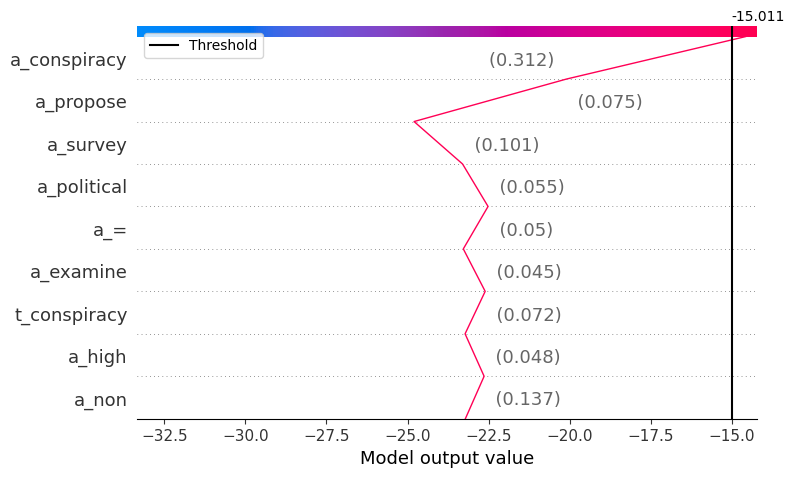

In [25]:
import numpy as np

shap_plotter = ShapPlotter(model, X_test[0:10], feature_names)

for i in range(5):
    print(f"Truth: {y_test[i]}")
    print(f"Prediction: {raw_threshold_predict(model, X_test[i], threshold)}")
    print(
        f"Shap value: {shap_plotter.shap_values[i].sum() + shap_plotter.expected_value}"
    )
    print(f"Prediction score: {predict_scores(model, X_test[i])}")
    decision_plot = shap_plotter.single_decision_plot(
        threshold=threshold, index=i, num_display=10, log_scale=False
    )
    decision_plot.show()